# 2017 Kaggle Machine Learning & Data Science Survey
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('dataset/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# 16,716명의 응답자
mcq = pd.read_csv('dataset/multipleChoiceResponses.csv',
                 encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.tail(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16706,Male,Australia,NaN,Employed full-time,NaN,NaN,Yes,NaN,Other,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16707,Female,Indonesia,30.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16708,Male,Indonesia,21.0,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,Male,People 's Republic of China,34.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16710,Male,People 's Republic of China,23.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


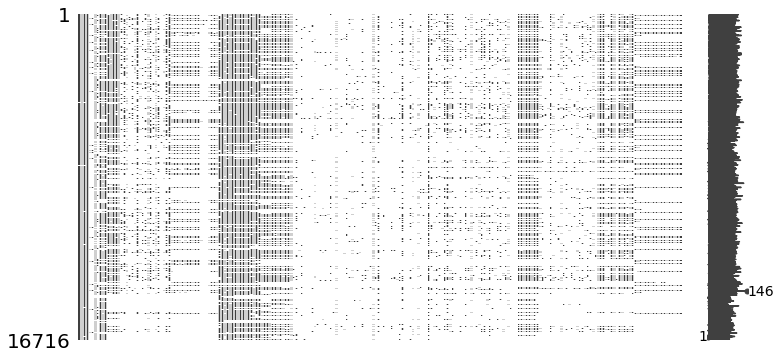

In [7]:
# NaN 데이터 시각화
import missingno as msno
msno.matrix(mcq, figsize=(12, 6))

 - 총 290개의 질문(객관식 228개, 주관식 62개)에 대해 응답하지 않은 질문 다수
***

## 설문통계
#### 성별

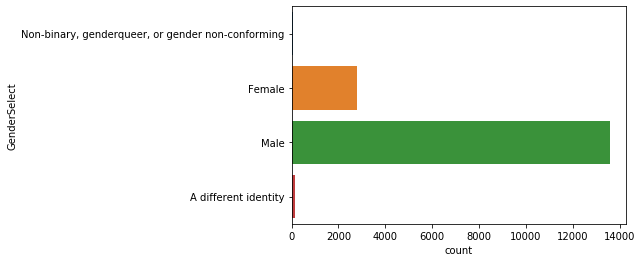

In [8]:
sns.countplot(y='GenderSelect', data=mcq)

#### 국가별 응답 수

In [9]:
country_df = pd.DataFrame(mcq['Country'].value_counts())
country_df['국가'] = country_df.index
country_df.columns = ['응답 수', '국가']

# reset_index : 기존의 행 인덱스 제거
country_df = country_df.reset_index().drop('index', axis=1)
country_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


#### 연령

In [10]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

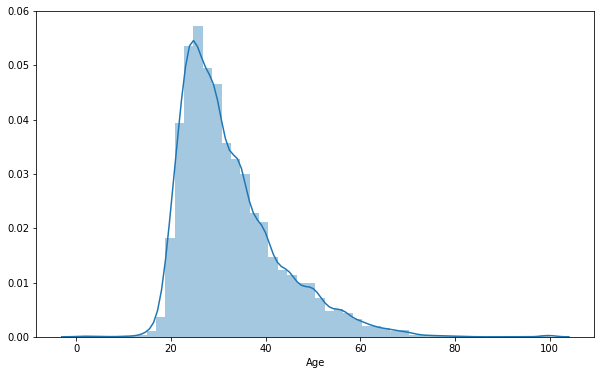

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(mcq[mcq['Age']>0]['Age'])

***
## 학력

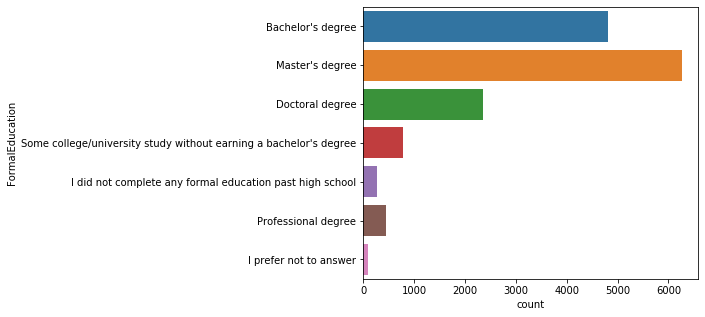

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(y='FormalEducation', data=mcq)

 - 박사 학위 < 학사 학위 < 석사 학위

***
## 전공

In [13]:
# value_count에서 normalize=True 사용 시 해당 데이터의 비율 알 수 있음
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))*100

mcq_major_df = mcq_major_count.merge(mcq_major_percent,
                                    left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율(%)']
mcq_major_df

,응답 수,비율(%)
Computer Science,4397,33.107447
Mathematics or statistics,2220,16.715609
Engineering (non-computer focused),1339,10.082072
Electrical Engineering,1303,9.811008
Other,848,6.385061
Physics,830,6.249529
"Information technology, networking, or system administration",693,5.217981
A social science,531,3.998193
Biology,274,2.063098
Management information systems,237,1.784504


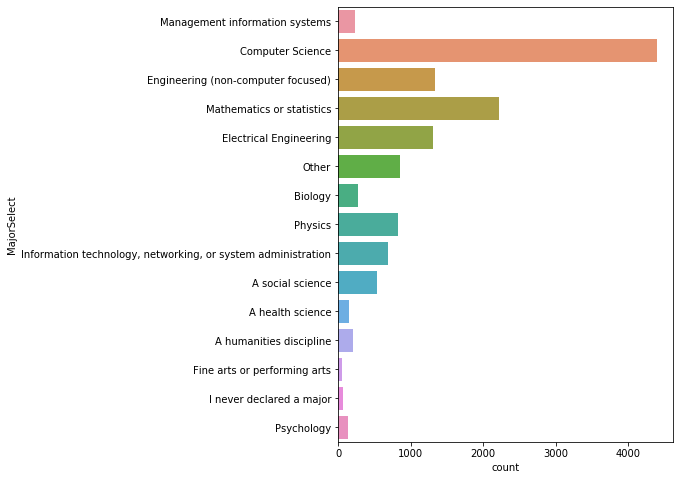

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

***
## 취업 여부

In [15]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))*100
mcq_es_df = mcq_es_count.merge(mcq_es_percent,
                              left_index=True, right_index=True)

mcq_es_df.columns = ['응답 수', '비율(%)']
mcq_es_df

,응답 수,비율(%)
Employed full-time,10897,65.189040
"Not employed, but looking for work",2110,12.622637
"Independent contractor, freelancer, or self-employed",1330,7.956449
"Not employed, and not looking for work",924,5.527638
Employed part-time,917,5.485762
I prefer not to say,420,2.512563
Retired,118,0.705911


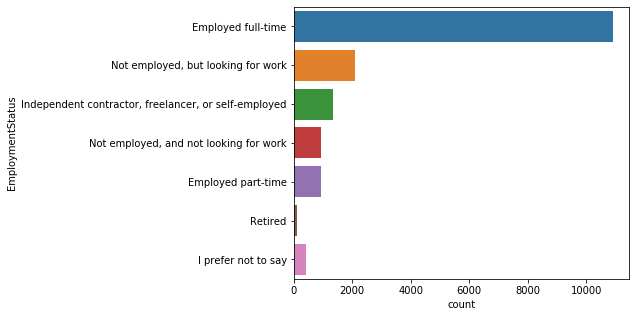

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(y='EmploymentStatus', data=mcq)

 - 응답자의 대부분(65%)이 풀타임으로 근무
***
## 프로그래밍 경험

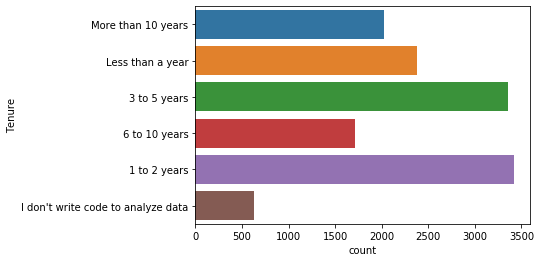

In [17]:
sns.countplot(y='Tenure', data=mcq)

 - 우리나라 기준

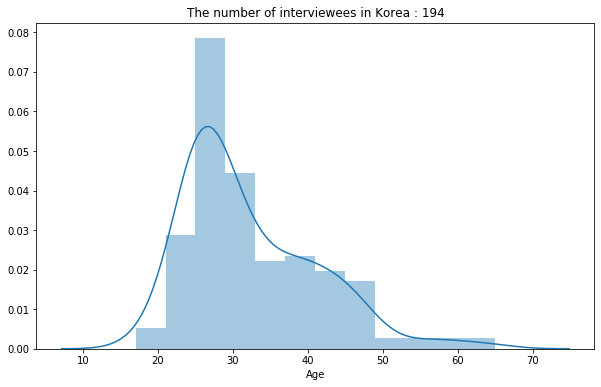

In [18]:
korea = mcq[mcq['Country'] == 'South Korea']
title = 'The number of interviewees in Korea : ' + str(korea.shape[0])

plt.figure(figsize=(10, 6))
sns.distplot(korea['Age'].dropna())
plt.title(title)
plt.show()

In [19]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


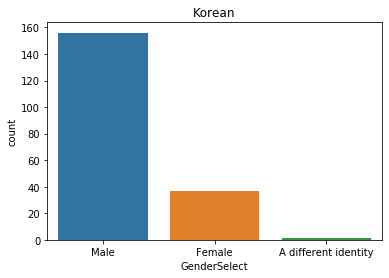

In [20]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')
plt.show()

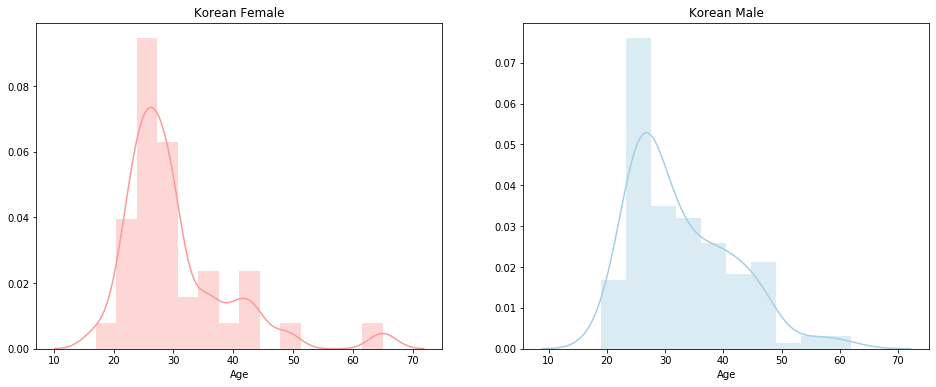

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(16, 6)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
ax1.title.set_text('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
ax2.title.set_text('Korean Male')

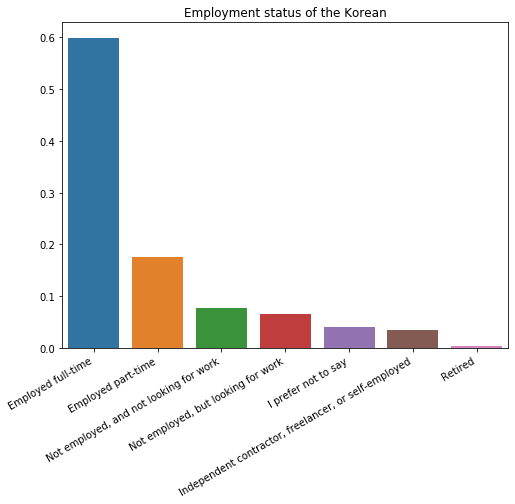

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

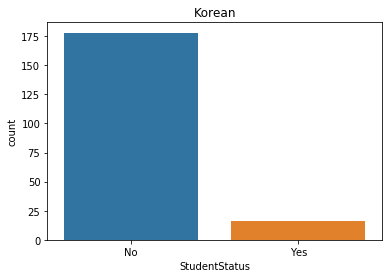

In [23]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Korean')
plt.show()

***
## 자주 묻는 질문 FAQ

#### Q1. Python vs R

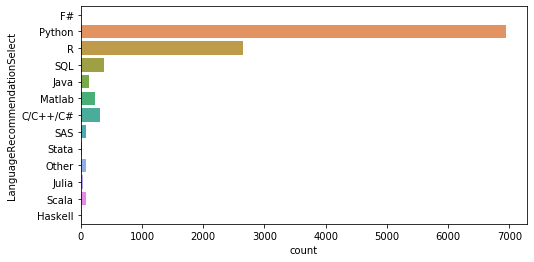

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

 - R < Python

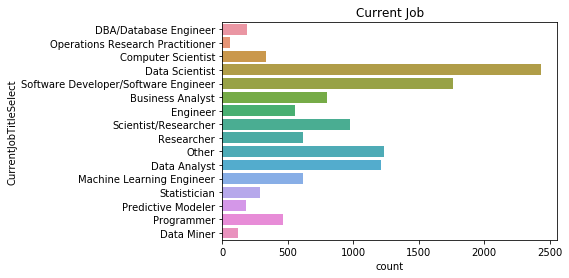

In [25]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])
plt.title('Current Job')
plt.show()

 - 현재 하고 있는 일에 대한 응답자 중 R과 Python 사용자 비율

In [26]:
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) &
          (mcq['LanguageRecommendationSelect'] == 'Python') | 
          (mcq['LanguageRecommendationSelect'] == 'R')]
print(data.shape)

(7737, 228)


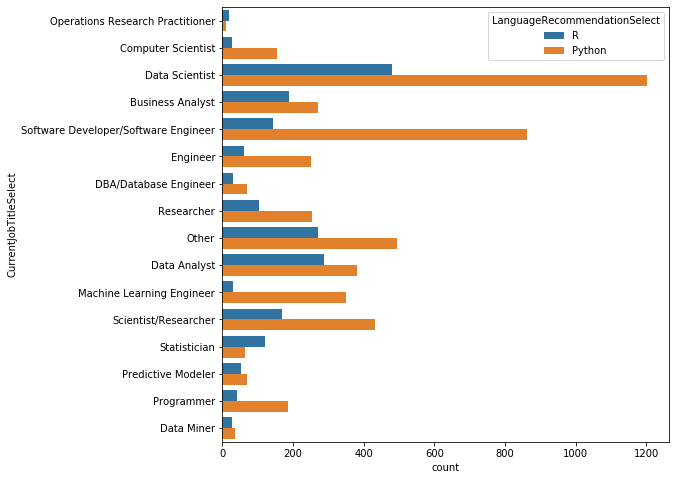

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(y='CurrentJobTitleSelect',
             hue='LanguageRecommendationSelect',
             data=data)

 - Operations Research Practitioner, Statistician만 R 선호
 
#### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까?
 - Data Science Tool

In [28]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))*100

mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent,
                                        left_index=True, right_index=True)
mcq_ml_tool_df.columns = ['응답 수', '비율(%)']
mcq_ml_tool_df.head(15)

,응답 수,비율(%)
TensorFlow,2621,23.831606
Python,1713,15.575559
R,910,8.274232
Spark / MLlib,755,6.864885
Hadoop/Hive/Pig,417,3.791598
Other,407,3.700673
Amazon Machine Learning,392,3.564284
Jupyter notebooks,358,3.255137
I don't plan on learning a new tool/technology,341,3.100564
Google Cloud Compute,296,2.691398


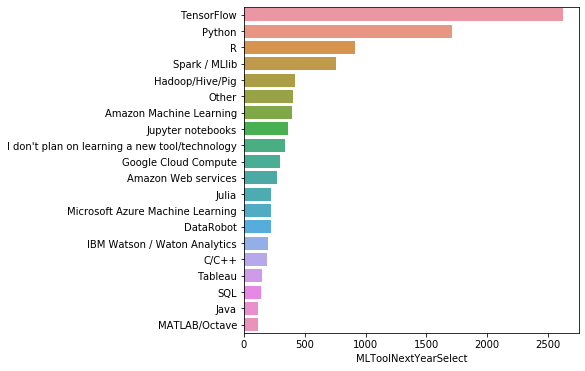

In [29]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
plt.figure(figsize=(6,6))
sns.barplot(y=data.index, x=data)

 - 다음 해에 주목할 만한 Data Science Methods

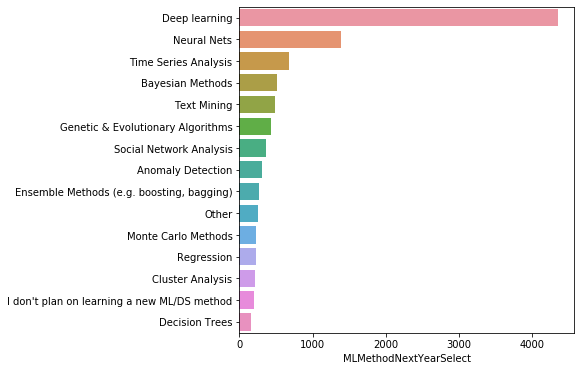

In [30]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
plt.figure(figsize=(6,6))
sns.barplot(y=data.index, x=data)

#### Q3. 어디에서 데이터 사이언스를 배워야 할까?

In [31]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),
             axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

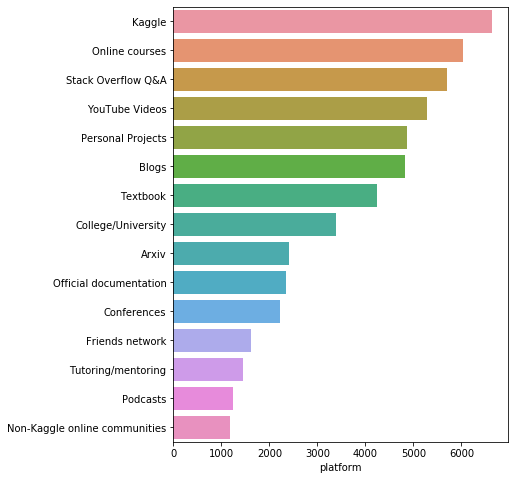

In [32]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [33]:
# 설문 내용과 누구에게 물어봤는지
qc = question[question['Column'].str.contains('LearningCategory')]
qc

,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [34]:
use_features = [x for x in mcq.columns 
               if x.find('LearningPlatformUsefulness') != -1]

 - 학습플랫폼의 유용함에 대한 상관관계

In [35]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'): ]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)
fdf.head(10)

,Not Useful,Somewhat useful,Very useful
Projects,0.008135,0.247184,0.744681
Courses,0.007844,0.292056,0.700100
SO,0.011348,0.362411,0.626241
Kaggle,0.008507,0.372323,0.619171
Tutoring,0.022440,0.399018,0.578541
Textbook,0.016503,0.429562,0.553934
College,0.030068,0.418279,0.551652
Arxiv,0.015475,0.434128,0.550397
Documentation,0.018096,0.459716,0.522189
Communities,0.014011,0.496497,0.489492


(18.0, 0.0)

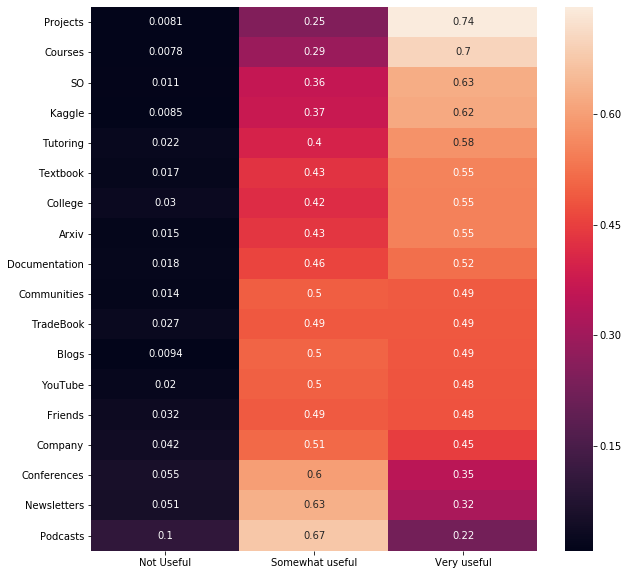

In [36]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(fdf, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

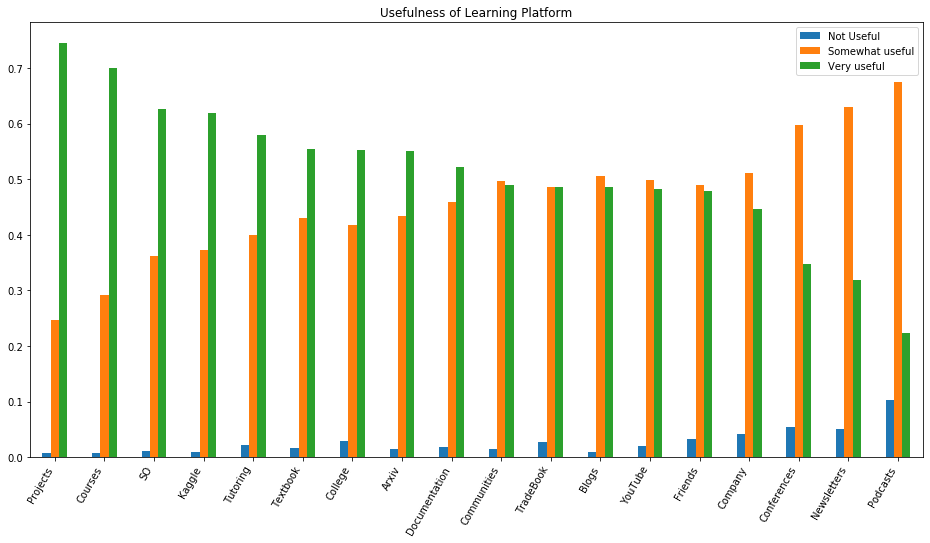

In [37]:
fdf.plot(kind='bar', figsize=(16,8))
plt.xticks(rotation=60, ha='right')
plt.title('Usefulness of Learning Platform')
plt.show()

 - 실제로 프로젝트를 해보는 것이 유용하다는 응답자가 제일 많음

In [38]:
cat_features = [x for x in mcq.columns
               if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [39]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'): ]] = mcq[feature].mean()
    
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

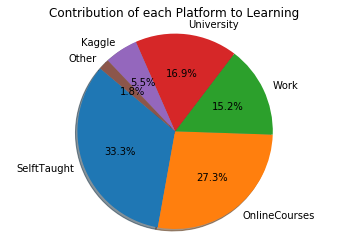

In [40]:
plt.pie(cdf, labels=cdf.index,
       autopct='%0.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

#### Q4. 데이터 사이언스 공부에 얼마나 많은 시간을 투자하는지?

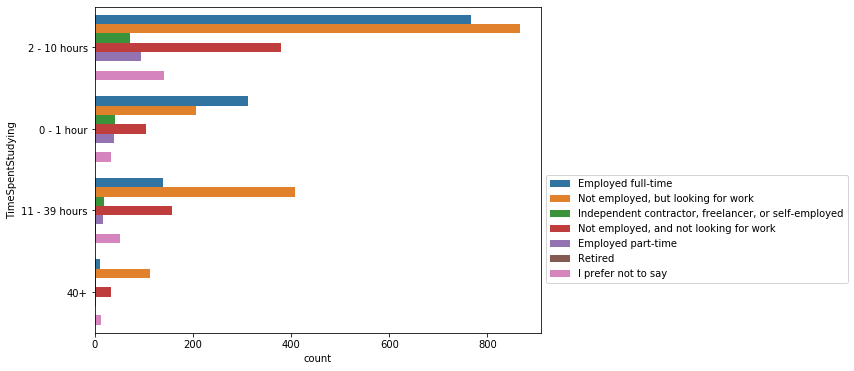

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(y='TimeSpentStudying', data=mcq,
             hue='EmploymentStatus')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

#### Q5. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [42]:
job_features = [x for x in mcq.columns
               if x.find('JobSkillImportance') != -1 and
               x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [43]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'): ]] = a
    
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


(10.0, 0.0)

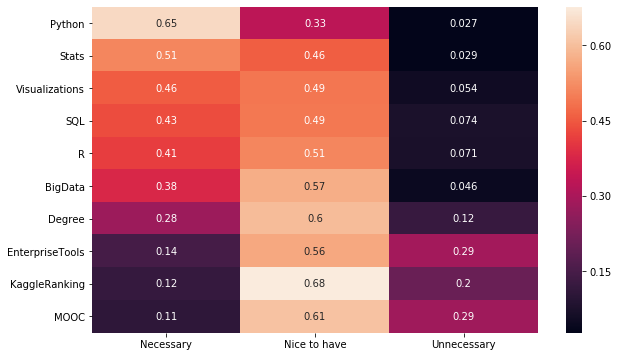

In [44]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(jdf.sort_values('Necessary', ascending=False), annot=True)
(bottom, top) = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

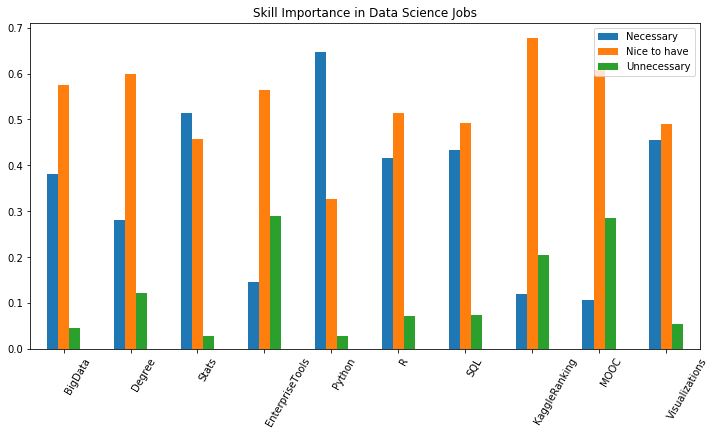

In [45]:
jdf.plot(kind='bar', figsize=(12,6),
        title='Skill Importance in Data Science Jobs')
plt.xticks(rotation=60, ha='left')

 - Python, R, SQL, 통계, 시각화는 꼭 필요하다고 생각

#### Q6. 데이터 과학자의 평균 급여는 얼마나 될까?

In [46]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [47]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')

rates = pd.read_csv('dataset/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = mcq[['CompensationAmount', 'CompensationCurrency',
             'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency',
                     right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']
                                )*salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


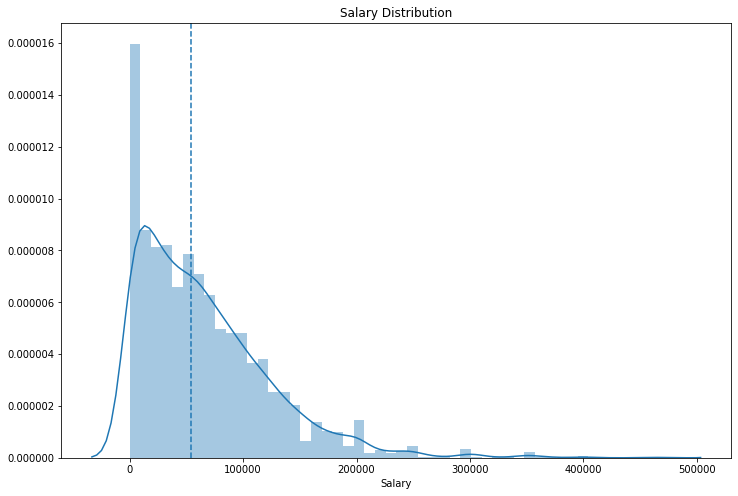

In [48]:
plt.figure(figsize=(12,8))
salary = salary[salary['Salary'] < 500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution')
plt.show()

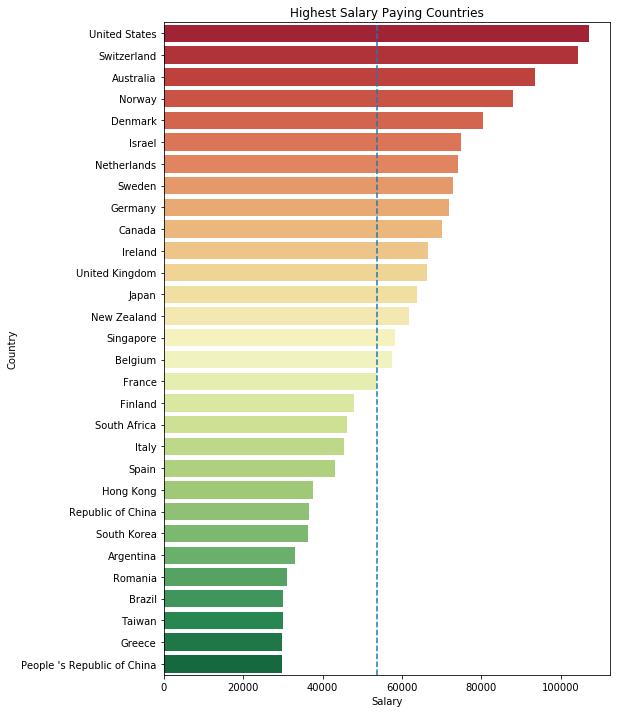

In [49]:
plt.figure(figsize=(8,12))
sal_coun = salary.groupby('Country')['Salary'
                                    ].median().sort_values(ascending=False
                                                          )[:30].to_frame()
sns.barplot('Salary', sal_coun.index,
           data=sal_coun, palette='RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')
plt.show()

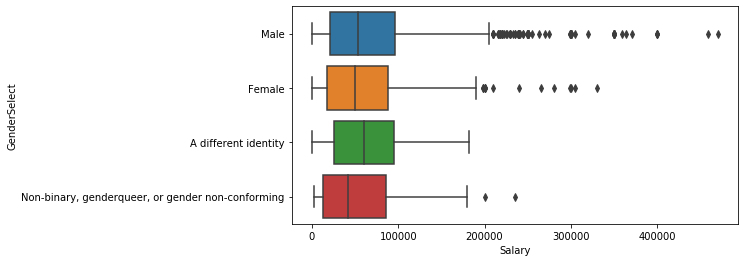

In [50]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

#### Q7. 데이터 사이언티스트가 되기 위해 학위가 중요할까?

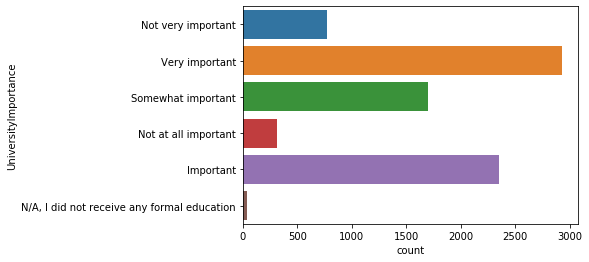

In [51]:
sns.countplot(y='UniversityImportance', data=mcq)

In [52]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni

Very important          2925
Important               2347
Somewhat important      1695
Not very important       772
Not at all important     317
Name: UniversityImportance, dtype: int64

In [53]:
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & 
                           (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index
fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

 - 연령대가 높은 응답자들은 학위가 그다지 중요하지 않다고 응답
 - 20~30대 응답자들은 학위가 매우 중요하다고 응답